In [28]:
# 1. Load Data and Initial Inspection
import pandas as pd

# Load medals dataset
df = pd.read_csv('C:\\Users\\Ali\\Desktop\\medals.csv')

In [29]:
# Display basic information
df.head()

,medal_type,medal_code,medal_date,name,gender,discipline,event,event_type,url_event,code,country_code,country,country_long
0,Gold Medal,1.0,2024-07-27,Remco EVENEPOEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903136,BEL,Belgium,Belgium
1,Silver Medal,2.0,2024-07-27,Filippo GANNA,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520,ITA,Italy,Italy
2,Bronze Medal,3.0,2024-07-27,Wout van AERT,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903147,BEL,Belgium,Belgium
3,Gold Medal,1.0,2024-07-27,Grace BROWN,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1940173,AUS,Australia,Australia
4,Silver Medal,2.0,2024-07-27,Anna HENDERSON,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1912525,GBR,Great Britain,Great Britain


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   medal_type    1044 non-null   object 
 1   medal_code    1043 non-null   float64
 2   medal_date    1044 non-null   object 
 3   name          1044 non-null   object 
 4   gender        1044 non-null   object 
 5   discipline    1044 non-null   object 
 6   event         1044 non-null   object 
 7   event_type    1044 non-null   object 
 8   url_event     1035 non-null   object 
 9   code          1044 non-null   object 
 10  country_code  1044 non-null   object 
 11  country       1044 non-null   object 
 12  country_long  1044 non-null   object 
dtypes: float64(1), object(12)
memory usage: 106.2+ KB


In [31]:
# 2. Handle Missing Values
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Replace missing values in medal columns with the column mean if they exist
for col in ['Gold', 'Silver', 'Bronze']:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

# Drop rows where critical columns like 'country' are missing
if 'country' in df.columns:
    df.dropna(subset=['country'], inplace=True)


Missing values per column:
 medal_type      0
medal_code      1
medal_date      0
name            0
gender          0
discipline      0
event           0
event_type      0
url_event       9
code            0
country_code    0
country         0
country_long    0
dtype: int64


In [32]:
# 3. Identify and Remove Duplicates
print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [33]:
# 4. Create numeric medal counts per country
medal_counts = df.groupby('country')['medal_type'].value_counts().unstack(fill_value=0).reset_index()

# Rename columns to standard numeric names
# Make sure the order matches your actual data
medal_counts.columns = ['country', 'Bronze', 'Gold', 'Silver']

print("Medal counts per country:")
print(medal_counts.head())


Medal counts per country:
     country  Bronze  Gold  Silver
0        AIN       1     1       3
1    Albania       2     0       0
2    Algeria       1     2       0
3  Argentina       1     1       1
4    Armenia       1     0       3


In [34]:
# 5. Optional: Standardize numeric columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
medal_cols = ['Gold', 'Silver', 'Bronze']
medal_counts[medal_cols] = scaler.fit_transform(medal_counts[medal_cols])

print("Standardized medal counts:")
print(medal_counts.head())


Standardized medal counts:
     country    Bronze      Gold    Silver
0        AIN -0.490291 -0.372313 -0.087643
1    Albania -0.336343 -0.516839 -0.535599
2    Algeria -0.490291 -0.227786 -0.535599
3  Argentina -0.490291 -0.372313 -0.386280
4    Armenia -0.490291 -0.516839 -0.087643


In [35]:
# 6. Interactive Visualizations
import plotly.express as px
import plotly.figure_factory as ff


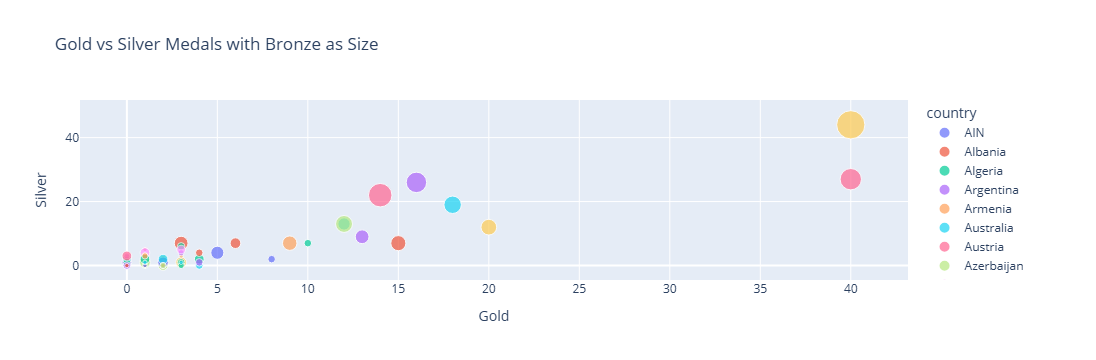

In [37]:
# 6-1. Scatter Plot: Gold vs Silver with Bronze as size
# Actual medal counts per country
medal_counts_raw = df.groupby('country')['medal_type'].value_counts().unstack(fill_value=0).reset_index()
medal_counts_raw.columns = ['country', 'Bronze', 'Gold', 'Silver']

import plotly.express as px

fig = px.scatter(medal_counts_raw,
                 x='Gold',
                 y='Silver',
                 size='Bronze',   # all values >= 0
                 color='country',
                 hover_name='country',
                 title='Gold vs Silver Medals with Bronze as Size')
fig.show()


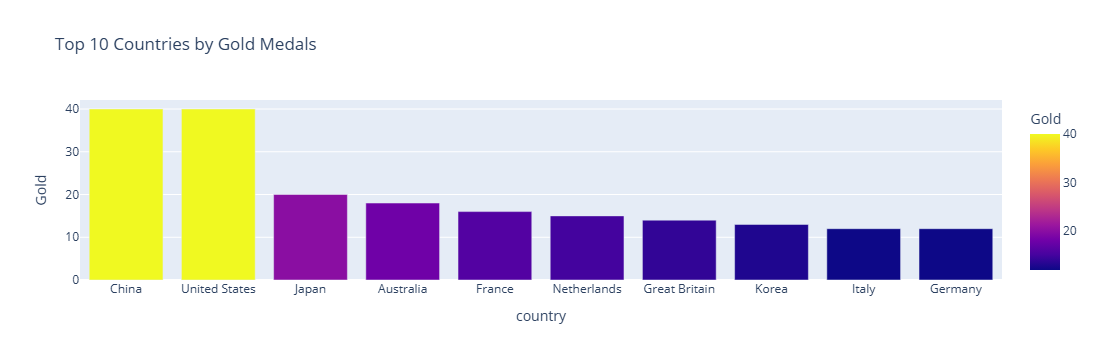

In [40]:
# 6-2. Top 10 Countries by Gold Medals (Bar Chart)
if all(col in medal_counts_raw.columns for col in ['Gold', 'country']):
    top10 = medal_counts_raw.sort_values('Gold', ascending=False).head(10)
    fig = px.bar(top10,
                 x='country',
                 y='Gold',
                 color='Gold',
                 title='Top 10 Countries by Gold Medals')
    fig.show()




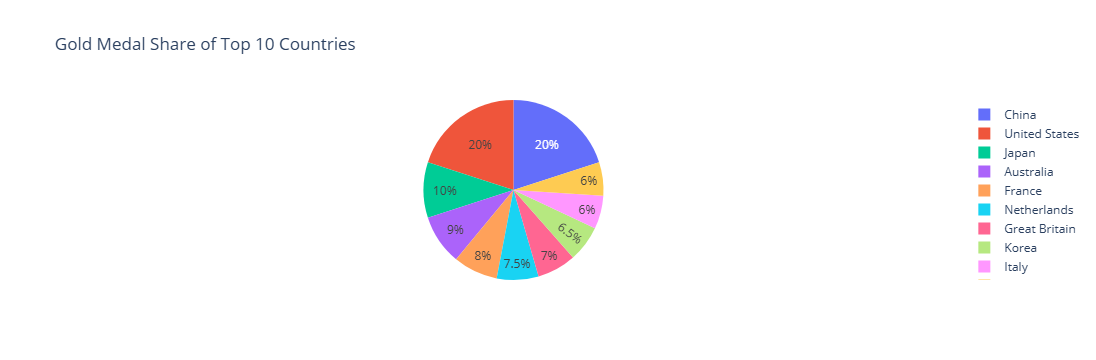

In [41]:
# 6-3. Gold Medal Share of Top 10 Countries (Pie Chart)
fig = px.pie(top10,
             names='country',
             values='Gold',
             title='Gold Medal Share of Top 10 Countries')
fig.show()




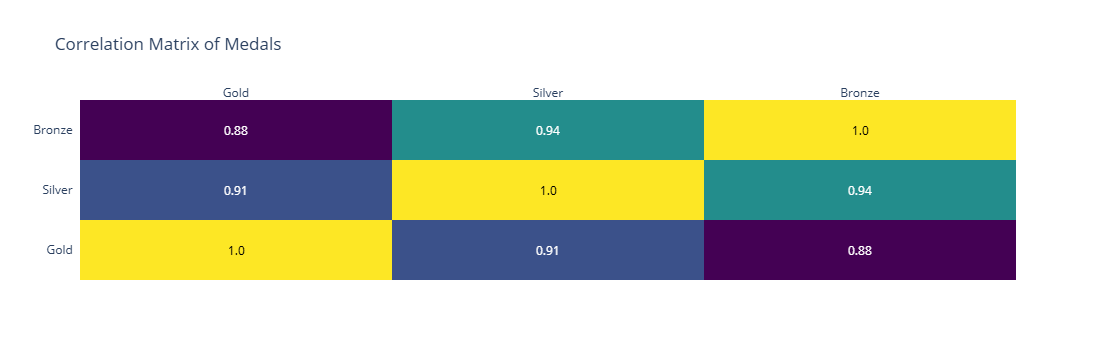

In [42]:
# 6-4. Correlation Matrix Heatmap
corr_matrix = medal_counts[['Gold', 'Silver', 'Bronze']].corr()
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    annotation_text=corr_matrix.round(2).values,
    colorscale='Viridis'
)
fig.update_layout(title_text='Correlation Matrix of Medals')
fig.show()